In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import tensorflow as tf


In [54]:
df = pd.read_csv("dataset.csv", index_col = 0, delimiter = ',')

In [55]:
df.columns

Index(['P_vent', 'P_technique', 'P_room_heating', 'P_room_cooling', 'P_pump',
       'P_lightnig', 'P_heating', 'P_all_power', 'E_lighting',
       'Q_rate_equipment', 'Q_rate_people', 'P_condition_all', 'T_amb',
       'T_rate', 'T_rate_room', 'T_room', 'der(T_amb)', 'der(T_room)',
       'n_rate_equipment', 'n_rate_humidity', 'n_rate_people', 'temp_val'],
      dtype='object')

In [56]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['P_all_power'].values.reshape(-1,1))

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:train_size, :]
test_data = scaled_data[train_size-60:, :]

X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))


model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=32)

test_data = scaled_data[train_size - 60:, : ]



Epoch 1/20
257/257 [==============================] - 19s 52ms/step - loss: 0.0130
Epoch 2/20
257/257 [==============================] - 14s 53ms/step - loss: 0.0064
Epoch 3/20
257/257 [==============================] - 14s 53ms/step - loss: 0.0050
Epoch 4/20
257/257 [==============================] - 14s 56ms/step - loss: 0.0043
Epoch 5/20
257/257 [==============================] - 13s 50ms/step - loss: 0.0040
Epoch 6/20
257/257 [==============================] - 9s 36ms/step - loss: 0.0035
Epoch 7/20
257/257 [==============================] - 11s 42ms/step - loss: 0.0035
Epoch 8/20
257/257 [==============================] - 10s 40ms/step - loss: 0.0033
Epoch 9/20
257/257 [==============================] - 10s 38ms/step - loss: 0.0033
Epoch 10/20
257/257 [==============================] - 10s 39ms/step - loss: 0.0032
Epoch 11/20
257/257 [==============================] - 11s 42ms/step - loss: 0.0032
Epoch 12/20
257/257 [==============================] - 10s 40ms/step - loss: 0.0031
Ep

In [57]:

x_test = []
y_test = df['P_all_power'][train_size : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions) 


65/65 [==============================] - 2s 12ms/step


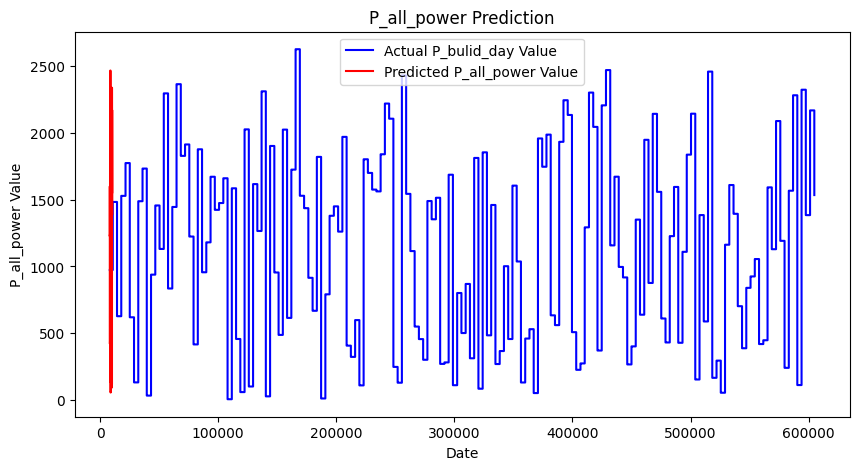

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['P_all_power'][train_size:], color='blue', label='Actual P_bulid_day Value')
plt.plot(range(train_size,len(df)), predictions, color='red', label='Predicted P_all_power Value')
plt.title('P_all_power Prediction')
plt.xlabel('Date')
plt.ylabel('P_all_power Value')
plt.legend()
plt.show()


In [59]:
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.regularizers import l2


scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['P_all_power'].values.reshape(-1,1))

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:train_size, :]
test_data = scaled_data[train_size-60:, :]

X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model = Sequential()
model.add(Bidirectional(LSTM(units=100, return_sequences=True, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)), input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.3))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=50, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(units=1))


model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=32)

test_data = scaled_data[train_size - 60:, : ]


Epoch 1/10
257/257 [==============================] - 36s 116ms/step - loss: 2.0025
Epoch 2/10
257/257 [==============================] - 31s 121ms/step - loss: 0.8736
Epoch 3/10
257/257 [==============================] - 31s 120ms/step - loss: 0.4447
Epoch 4/10
257/257 [==============================] - 31s 121ms/step - loss: 0.2056
Epoch 5/10
257/257 [==============================] - 32s 123ms/step - loss: 0.0864
Epoch 6/10
257/257 [==============================] - 31s 120ms/step - loss: 0.0348
Epoch 7/10
257/257 [==============================] - 31s 119ms/step - loss: 0.0162
Epoch 8/10
257/257 [==============================] - 30s 118ms/step - loss: 0.0099
Epoch 9/10
257/257 [==============================] - 30s 115ms/step - loss: 0.0084
Epoch 10/10
257/257 [==============================] - 31s 119ms/step - loss: 0.0078


In [60]:

x_test = []
y_test = df['P_all_power'][train_size : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions) 

65/65 [==============================] - 3s 34ms/step


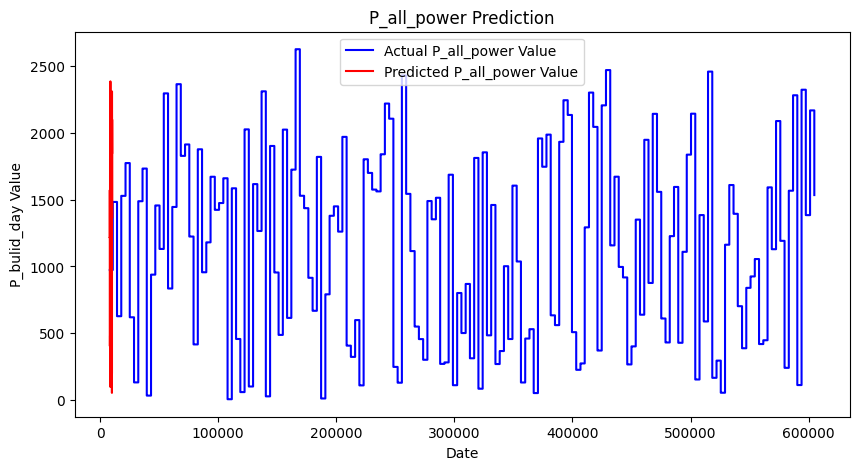

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['P_all_power'][train_size:], color='blue', label='Actual P_all_power Value')
plt.plot(range(train_size,len(df)), predictions, color='red', label='Predicted P_all_power Value')
plt.title('P_all_power Prediction')
plt.xlabel('Date')
plt.ylabel('P_bulid_day Value')
plt.legend()
plt.show()
